### Energy Use Correlation

**Motivation**: The balance between energy consumption and environmental conservation is an important issue for both policymakers and the public. As countries grow and use more energy, it’s important to ask: Is this growth coming at the cost of natural land? **bold text**


**Dataset Used:** World Development Indicators Data Set

# Research Questions
* Do forest area and terrestrial and marine protected areas correlate equally strongly with a country’s energy use (kg of oil equivalent per capita) or is one of these correlations significantly stronger than the other?

* Do forest area and terrestrial and marine protected areas correlate equally strongly with energy use in countries like the USA, China, India, and Brazil

* How have forest area, energy use, and protected land changed over time in selected countries?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/cs180_project1/Indicators.csv')
data.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(5656458, 6)

# Set Indictators:

In [ ]:
# find the most recent year of forest area, Terrestrial and marine protected areas, and fossil fuel expectancy data and energy use data.
indicatortext1 = 'Forest area \(% of land area'
mask1 = data.IndicatorName.str.contains(indicatortext1)

indicatortext2 = 'Terrestrial and marine protected areas'
mask2 = data.IndicatorName.str.contains(indicatortext2)

indicatortext3 = 'Energy use \(kg of oil equivalent per capita'
mask3 = data.IndicatorName.str.contains(indicatortext3)

indicatortext4 = 'Fossil fuel energy consumption \(% of total'
mask4 = data.IndicatorName.str.contains(indicatortext4)

indicatortext5= 'Renewable energy'
mask5 = data.IndicatorName.str.contains(indicatortext5)

# hist_country1 = 'USA'
# mask6 = data.CountryCode.str.contains(hist_country1)

In [ ]:
#Define dataframes containing forest area for each country
#Terrestrial and marine protected areas for each country
#include year for time plots
stage1 = data[mask1][['CountryName', 'Year', 'Value']]
stage1.columns = ['CountryName', 'Year', 'ForestArea']

stage2 = data[mask2][['CountryName', 'Year', 'Value']]
stage2.columns = ['CountryName', 'Year', 'TerrestrialMarineProtectedAreas']

stage3 = data[mask3][['CountryName', 'Year', 'Value']]
stage3.columns = ['CountryName', 'Year', 'EnergyUse']

stage4 = data[mask4][['CountryName', 'Year', 'Value']]
stage4.columns = ['CountryName', 'Year', 'FossilFuel']

stage5 = data[mask5][['CountryName', 'Year', 'Value']]
stage5.columns = ['CountryName', 'Year', 'RenewableEnergy']


*Merge dataframes*

In [ ]:
#Combine these five dataframes into a single dataframe
#get an array of Terrestrial and marine protected areas, Forest area, energy use, and countries
combined = stage1.merge(stage2, on=['CountryName', 'Year'], how='outer') \
                 .merge(stage3, on=['CountryName', 'Year'], how='outer') \
                 .merge(stage4, on=['CountryName', 'Year'], how='outer') \
                 .merge(stage5, on=['CountryName', 'Year'], how='outer')

combined.head()

,CountryName,Year,ForestArea,TerrestrialMarineProtectedAreas,EnergyUse,FossilFuel,RenewableEnergy
0,Afghanistan,1990,2.067825,0.366883,NaN,NaN,52.954002
1,Afghanistan,1991,2.067825,0.366882,NaN,NaN,55.026697
2,Afghanistan,1992,2.067825,0.366882,NaN,NaN,62.241325
3,Afghanistan,1993,2.067825,0.366882,NaN,NaN,64.689392
4,Afghanistan,1994,2.067825,0.366882,NaN,NaN,66.776581


#Must Drop Nan Values
There is also some values appearing where some are 0 so those are dropped.

In [ ]:
# Drop rows with NaN values in any of the indicator columns
combined_clean = combined.dropna(subset=['ForestArea', 'TerrestrialMarineProtectedAreas', 'EnergyUse', 'FossilFuel', 'RenewableEnergy'])
# Remove rows where columns are 0.00
columns_to_check = ['ForestArea', 'EnergyUse', 'TerrestrialMarineProtectedAreas', 'FossilFuel', 'RenewableEnergy']
combined_clean = combined_clean.loc[(combined_clean[columns_to_check] != 0.00).all(axis=1)]


countries = combined_clean.CountryName.to_numpy()
forest = combined_clean.ForestArea.to_numpy()
protected_areas = combined_clean.TerrestrialMarineProtectedAreas.to_numpy()
energy = combined_clean.EnergyUse.to_numpy()
fossil = combined_clean.FossilFuel.to_numpy()
renewable = combined_clean.RenewableEnergy.to_numpy()
# Display the cleaned dataframe
print(combined_clean.head())

In [ ]:
# df_sorted = combined_clean.sort_values(by="FossilFuel")
# print(df_sorted.head())

In [ ]:
df_sorted = combined_clean.sort_values(by="EnergyUse")
print(df_sorted.head())


# Plots on overall data

In [ ]:
#decided not to include in our slides
#An exploratory plot of Fossil Fuel Consumption versus Protected Areas

# # Create the scatter plot
# plt.figure(figsize=(8.5, 6))

# plt.scatter(fossil, protected_areas, c='blue', s=30)
# plt.axis([0, 100, 0, 110])  # Set appropriate axis limits for percentages
# plt.xlabel('Fossil Fuel Energy Consumption (% of total)', fontsize=14)
# plt.ylabel('Terrestrial & Marine Protected Areas (% of total area)', fontsize=14)
# plt.title('Fossil Fuel Energy Consumption Versus % of Protected Areas', fontsize=16)

# # Calculate the correlation coefficient
# correlation_coefficient = np.corrcoef(fossil, protected_areas)[0, 1]

# # Annotate the plot with the correlation coefficient
# plt.text(10, 100, f'Correlation Coefficient = {correlation_coefficient:.3f}', fontsize=12, color='red')

# plt.show()

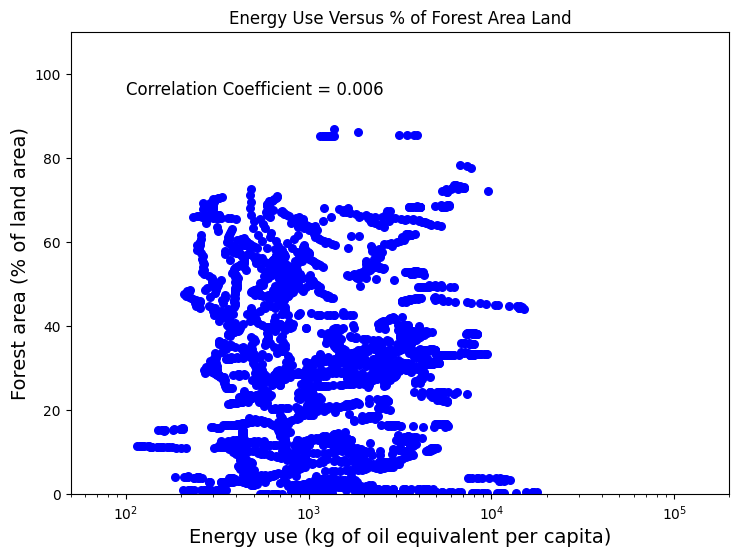

In [ ]:
#An exploratory plot of ForestArea versus EnergyUse per capita and compute a correlation coefficeint

plt.figure(figsize=(8.5,6))

plt.scatter(energy,forest,c='blue',s=30)
plt.axis([50,200000,0,110])
plt.xscale('log') #plots x-axis on a logarithmic scale.
plt.xlabel('Energy use (kg of oil equivalent per capita)',fontsize=14)
plt.ylabel('Forest area (% of land area)',fontsize=14)
plt.title('Energy Use Versus % of Forest Area Land')

#Use plt.text to annotate plot.
plt.text(100,95,f'Correlation Coefficient = {np.corrcoef(forest,energy)[0,1]:.3f}',fontsize=12)

plt.show()

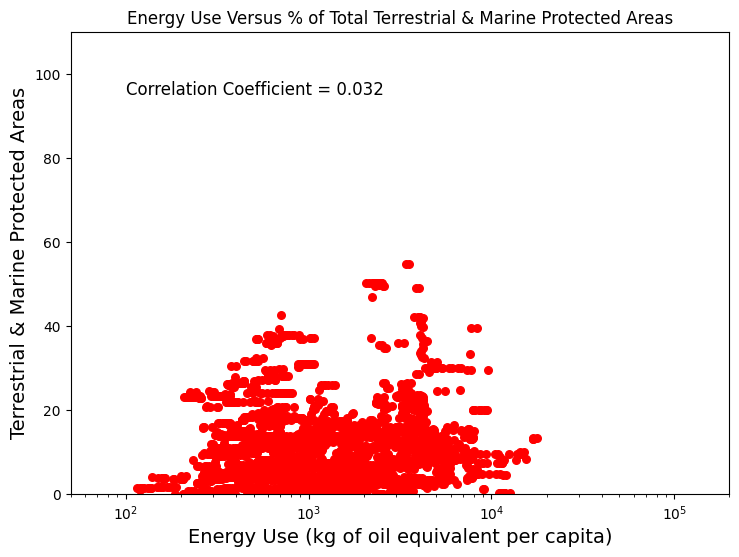

In [ ]:
#An exploratory plot of Total Terrestrial and Marine Protected Areas versus EnergyUse
plt.figure(figsize=(8.5,6))
plt.scatter(energy,protected_areas,c='red',s=30)
plt.axis([50,200000,0,110])
plt.xscale('log')
plt.title('Energy Use Versus % of Total Terrestrial & Marine Protected Areas')
plt.xlabel('Energy Use (kg of oil equivalent per capita)',fontsize=14)
plt.ylabel('Terrestrial & Marine Protected Areas',fontsize=14)

# compute a correlation coefficeint
plt.text(100,95,f'Correlation Coefficient = {np.corrcoef(protected_areas,energy)[0,1]:.3f}',fontsize=12)

plt.show()

We found no strong correlation in energy use vs protected areas % and forest area % given all the countries in the data.Since it is such a large dataset let's take a closer look at **some countries:**


In [ ]:
# Define the list of countries
countries_search = ['United States', 'China', 'India', 'Brazil', 'Germany', "Russian Federation", "Bangladesh"]

# Filter the combined dataframe for the countries of interest
filtered_data = combined_clean[combined['CountryName'].isin(countries_search)]

# Display the filtered dataframe
print(filtered_data.head())

## USA Plots:

In [ ]:
# Filter data for the USA
USA_data = filtered_data[filtered_data['CountryName'] == 'United States']
# Extract the data
forest1 = USA_data['ForestArea']
energy1 = USA_data['EnergyUse']
protected_areas1 = USA_data['TerrestrialMarineProtectedAreas']

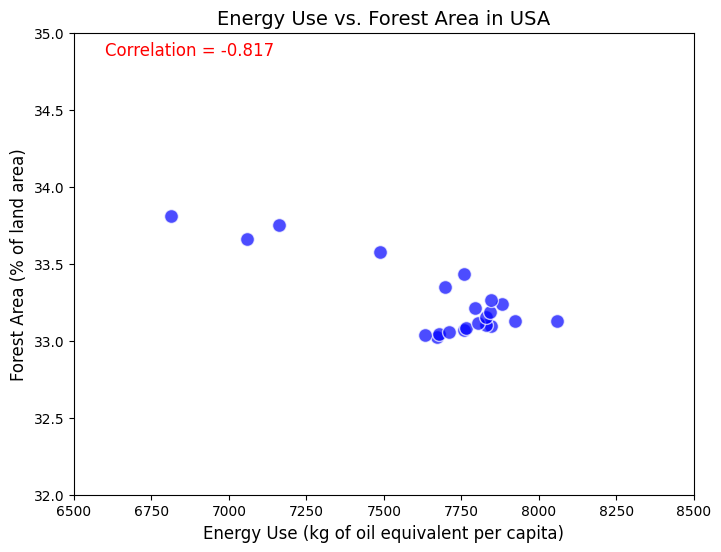

In [ ]:
# Calculate the correlation coefficient
corr_coef = np.corrcoef(energy1, forest1)[0, 1]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(energy1, forest1, c='blue', alpha=0.7, edgecolors='w', s=100)


# Add labels and title
plt.xlabel('Energy Use (kg of oil equivalent per capita)', fontsize=12)
plt.ylabel('Forest Area (% of land area)', fontsize=12)
plt.title('Energy Use vs. Forest Area in USA', fontsize=14)
plt.axis([6500,8500,32,35])
# Add correlation coefficient as text
plt.text(0.05, 0.95, f'Correlation = {corr_coef:.3f}', transform=plt.gca().transAxes, fontsize=12, color='red')


# Show the plot
plt.show()

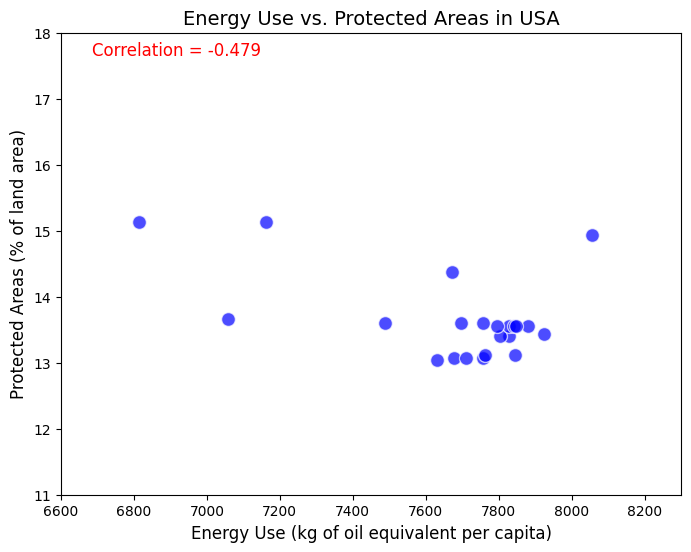

In [ ]:
# Calculate the correlation coefficient
corr_coef = np.corrcoef(protected_areas1, energy1)[0, 1]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(energy1, protected_areas1,c='blue', alpha=0.7, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Energy Use (kg of oil equivalent per capita)', fontsize=12)
plt.ylabel('Protected Areas (% of land area)', fontsize=12)
plt.title('Energy Use vs. Protected Areas in USA', fontsize=14)
plt.axis([6600,8300,11,18])

# Add correlation coefficient as text
plt.text(0.05, 0.95, f'Correlation = {corr_coef:.3f}', transform=plt.gca().transAxes, fontsize=12, color='red')


# Show the plot
plt.show()

# Brazil Plots

In [ ]:
# Filter data for brazil
br_data = filtered_data[filtered_data['CountryName'] == 'Brazil']

# Extract the data
forest2 = br_data['ForestArea']
energy2 = br_data['EnergyUse']
protected_areas2 = br_data['TerrestrialMarineProtectedAreas']

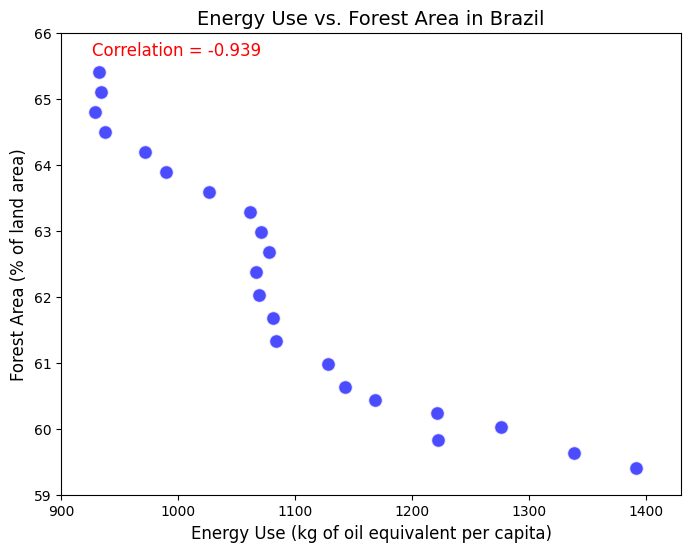

In [ ]:
#Brazil forest vs energy use

# Calculate the correlation coefficient
corr_coef = np.corrcoef(energy2, forest2)[0, 1]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(energy2, forest2, c='blue', alpha=0.7, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Energy Use (kg of oil equivalent per capita)', fontsize=12)
plt.ylabel('Forest Area (% of land area)', fontsize=12)
plt.title('Energy Use vs. Forest Area in Brazil', fontsize=14)
plt.axis([900,1430,59,66])

# Add correlation coefficient as text
plt.text(0.05, 0.95, f'Correlation = {corr_coef:.3f}', transform=plt.gca().transAxes, fontsize=12, color='red')

# Show the plot
plt.show()

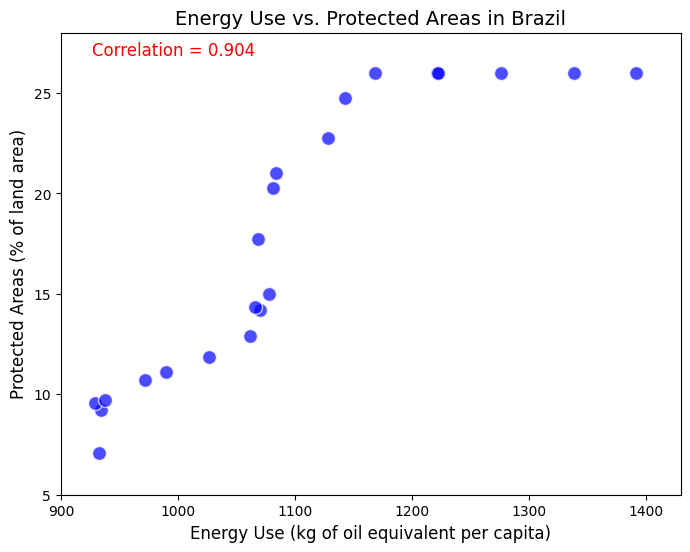

In [ ]:
# Calculate the correlation coefficient
corr_coef = np.corrcoef(energy2, protected_areas2)[0, 1]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(energy2, protected_areas2, c='blue', alpha=0.7, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Energy Use (kg of oil equivalent per capita)', fontsize=12)
plt.ylabel('Protected Areas (% of land area)', fontsize=12)
plt.title('Energy Use vs. Protected Areas in Brazil', fontsize=14)
plt.axis([900,1430,5,28])

# Add correlation coefficient as text
plt.text(0.05, 0.95, f'Correlation = {corr_coef:.3f}', transform=plt.gca().transAxes, fontsize=12, color='red')


# Show the plot
plt.show()

# China Plots

In [ ]:
cn_data = filtered_data[filtered_data['CountryName'] == 'China']
# Extract the data
forest3 = cn_data['ForestArea']
energy3 = cn_data['EnergyUse']
protected_areas3 = cn_data['TerrestrialMarineProtectedAreas']

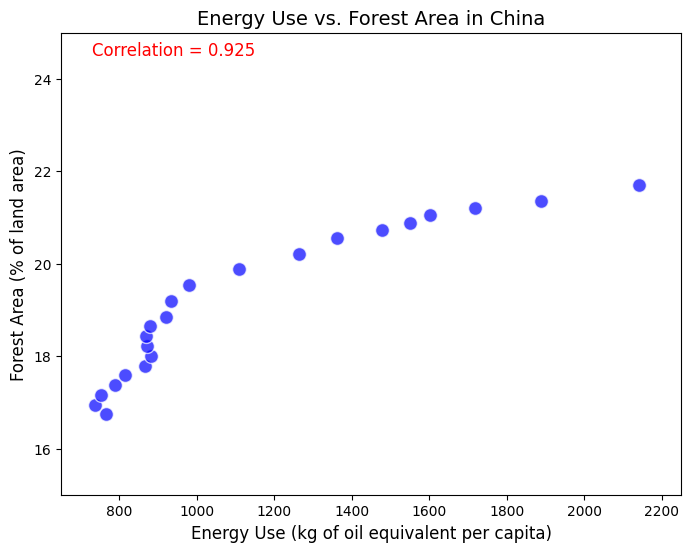

In [ ]:
#China forest vs energy use

# Calculate the correlation coefficient
corr_coef = np.corrcoef(energy3, forest3)[0, 1]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(energy3, forest3, c='blue', alpha=0.7, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Energy Use (kg of oil equivalent per capita)', fontsize=12)
plt.ylabel('Forest Area (% of land area)', fontsize=12)
plt.title('Energy Use vs. Forest Area in China', fontsize=14)
plt.axis([650,2250,15,25])

# Add correlation coefficient as text
plt.text(0.05, 0.95, f'Correlation = {corr_coef:.3f}', transform=plt.gca().transAxes, fontsize=12, color='red')

# Show the plot
plt.show()

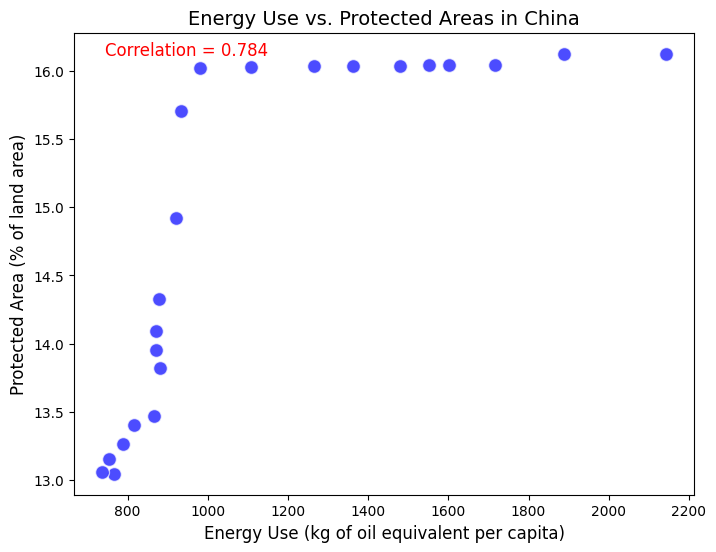

In [ ]:
#China forest vs energy use

# Calculate the correlation coefficient
corr_coef = np.corrcoef(energy3, protected_areas3)[0, 1]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(energy3, protected_areas3, c='blue', alpha=0.7, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Energy Use (kg of oil equivalent per capita)', fontsize=12)
plt.ylabel('Protected Area (% of land area)', fontsize=12)
plt.title('Energy Use vs. Protected Areas in China', fontsize=14)

# Add correlation coefficient as text
plt.text(0.05, 0.95, f'Correlation = {corr_coef:.3f}', transform=plt.gca().transAxes, fontsize=12, color='red')


# Show the plot
plt.show()

# India Plots

In [ ]:
in_data = filtered_data[filtered_data['CountryName'] == 'China']
# Extract the data
forest4 = in_data['ForestArea']
energy4 = in_data['EnergyUse']
protected_areas4 = in_data['TerrestrialMarineProtectedAreas']

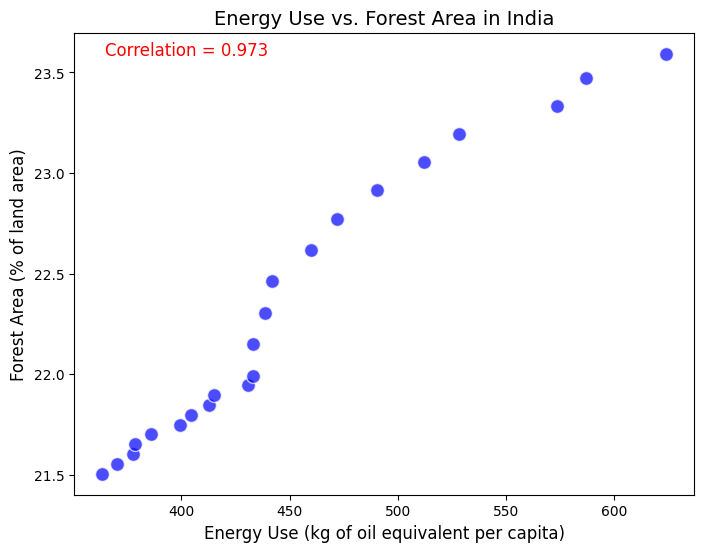

In [ ]:
#India forest vs energy use

# Calculate the correlation coefficient
corr_coef = np.corrcoef(energy4, forest4)[0, 1]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(energy4, forest4, c='blue', alpha=0.7, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Energy Use (kg of oil equivalent per capita)', fontsize=12)
plt.ylabel('Forest Area (% of land area)', fontsize=12)
plt.title('Energy Use vs. Forest Area in India', fontsize=14)

# Add correlation coefficient as text
plt.text(0.05, 0.95, f'Correlation = {corr_coef:.3f}', transform=plt.gca().transAxes, fontsize=12, color='red')

# Show the plot
plt.show()

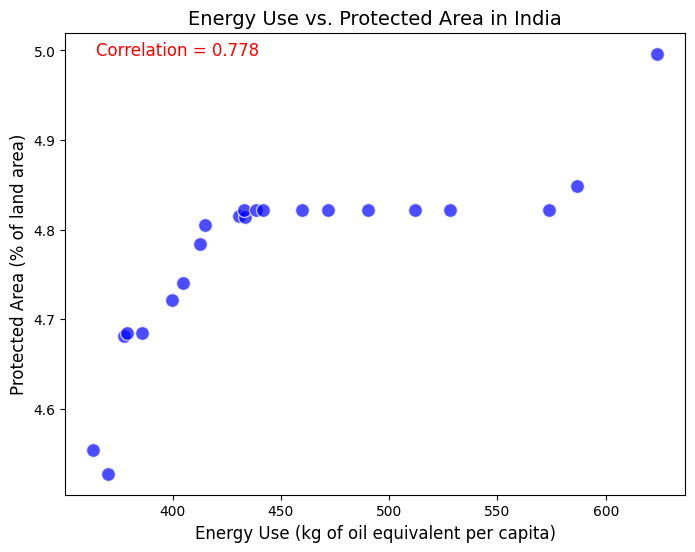

In [ ]:
#India protected areas vs energy use

# Calculate the correlation coefficient
corr_coef = np.corrcoef(energy4, protected_areas4)[0, 1]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(energy4, protected_areas4, c='blue', alpha=0.7, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Energy Use (kg of oil equivalent per capita)', fontsize=12)
plt.ylabel('Protected Area (% of land area)', fontsize=12)
plt.title('Energy Use vs. Protected Area in India', fontsize=14)

# Add correlation coefficient as text
plt.text(0.05, 0.95, f'Correlation = {corr_coef:.3f}', transform=plt.gca().transAxes, fontsize=12, color='red')


# Show the plot
plt.show()

# Time Plots

In [ ]:
# Extract data for each country
usa_data = filtered_data[filtered_data['CountryName'] == 'United States']
brazil_data = filtered_data[filtered_data['CountryName'] == 'Brazil']
germany_data = filtered_data[filtered_data['CountryName'] == 'Germany']
india_data = filtered_data[filtered_data['CountryName'] == 'India']
russia_data = filtered_data[filtered_data['CountryName'] == 'Russian Federation']

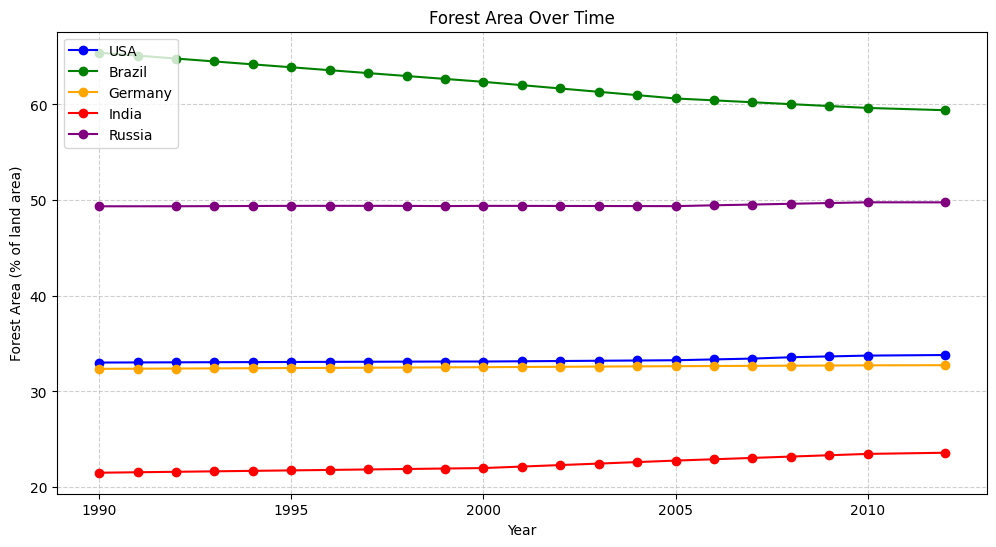

In [ ]:
import matplotlib.pyplot as plt

# Plot Forest Area over time
plt.figure(figsize=(12, 6))
plt.plot(usa_data['Year'], usa_data['ForestArea'], marker='o', label='USA', color='blue')
plt.plot(brazil_data['Year'], brazil_data['ForestArea'], marker='o', label='Brazil', color='green')
plt.plot(germany_data['Year'], germany_data['ForestArea'], marker='o', label='Germany', color='orange')
plt.plot(india_data['Year'], india_data['ForestArea'], marker='o', label='India', color='red')
plt.plot(russia_data['Year'], russia_data['ForestArea'], marker='o', label='Russia', color='purple')
plt.xlabel('Year')
plt.ylabel('Forest Area (% of land area)')
plt.title('Forest Area Over Time')
# plt.legend()
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

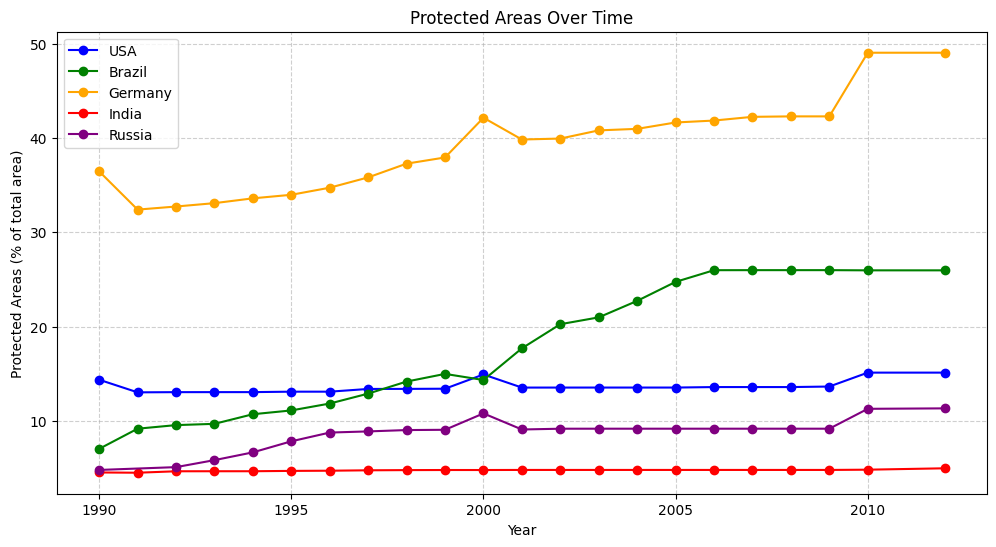

In [ ]:
# Plot Protected Areas over time
plt.figure(figsize=(12, 6))
plt.plot(usa_data['Year'], usa_data['TerrestrialMarineProtectedAreas'], marker='o', label='USA', color='blue')
plt.plot(brazil_data['Year'], brazil_data['TerrestrialMarineProtectedAreas'], marker='o', label='Brazil', color='green')
plt.plot(germany_data['Year'], germany_data['TerrestrialMarineProtectedAreas'], marker='o', label='Germany', color='orange')
plt.plot(india_data['Year'], india_data['TerrestrialMarineProtectedAreas'], marker='o', label='India', color='red')
plt.plot(russia_data['Year'], russia_data['TerrestrialMarineProtectedAreas'], marker='o', label='Russia', color='purple')
plt.xlabel('Year')
plt.ylabel('Protected Areas (% of total area)')
plt.title('Protected Areas Over Time')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

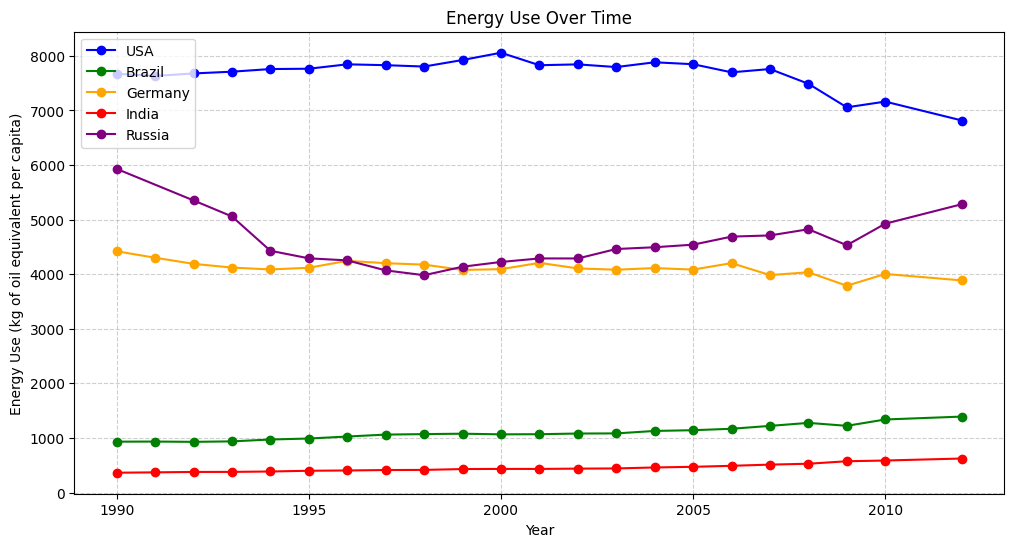

In [ ]:
# Plot Energy Use over time
plt.figure(figsize=(12, 6))
plt.plot(usa_data['Year'], usa_data['EnergyUse'], marker='o', label='USA', color='blue')
plt.plot(brazil_data['Year'], brazil_data['EnergyUse'], marker='o', label='Brazil', color='green')
plt.plot(germany_data['Year'], germany_data['EnergyUse'], marker='o', label='Germany', color='orange')
plt.plot(india_data['Year'], india_data['EnergyUse'], marker='o', label='India', color='red')
plt.plot(russia_data['Year'], russia_data['EnergyUse'], marker='o', label='Russia', color='purple')
plt.xlabel('Year')
plt.ylabel('Energy Use (kg of oil equivalent per capita)')
plt.title('Energy Use Over Time')
# plt.legend()
# Add legend to the top-left corner
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Findings
* In the USA and Brazil, as energy use increases there is less forest area % of land area

* In Brazil when the energy use increases we can see that so does the % of protected areas.

* As energy use increase so does the % of forest area and protected areas in China


References: https://databank.worldbank.org/source/world-development-indicators